# Project - Principal Component Analysis (PCA)
## Phi Le
### DATA - 4319


![](https://miro.medium.com/max/1400/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg)

### Principal-Component-Analysis
PCA is basically a technique for performing $\textbf{dimensionality}$ reduction of the datasets with the least effect on the variance of the datasets. This means removing the redundant features but keeping the important ones.

To achieve this, PCA transforms the variables of the dataset into a new set of variables. This new set of variables represents the principal components.

The most important features of these principal components are:

- All the PCs are orthogonal (i.e. they are at a right angle to each other).
- They are created in such a way that with the increasing number of components, the amount of variation that it retains starts decreasing.
- This means the 1st principal component retains the variation to the maximum extent as compared to the original variables.

PCA is basically used for $\textbf{summarizing}$ data. While dealing with a dataset there might be some features related to each other. Thus PCA helps you to reduce such features and make predictions with less number of features without compromising with the $\textbf{accuracy}$.

For example, consider the following diagram in which we have reduced a 3D space to a 2D space.

![](https://i2.wp.com/techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/03/principal-component-analysis.jpg?ssl=1)

**Compute the covariance matrix of the whole dataset ( sometimes also called as the variance-covariance matrix)**
![](https://miro.medium.com/max/870/1*kqEnWDvs366hEGtPsX7xbQ.png)

Let’s say we have a dataset which is d+1 dimensional. Where d could be thought as $X_{train}$ and 1 could be thought as $y_{train}$ (labels) in modern machine learning paradigm. So, $X_{train} + y_{train}$ makes up our complete train dataset.


Using the above formula, we can find the covariance matrix of A. Also, the result would be a square matrix of $dxd$ dimensions.


PCA can be thought of as an unsupervised learning problem. The whole process of obtaining principle components from a raw dataset can be simplified in six parts :

- Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.
- Compute the mean for every dimension of the whole dataset.
- Compute the covariance matrix of the whole dataset.
- Compute eigenvectors and the corresponding eigenvalues.
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.
- Use this d × k eigenvector matrix to transform the samples onto the new subspace.

### Project Example

#### Information about the dataset

This dataset contains the breast cancer data from scklearn which used for testing machine learning model.

In [1]:
#Import libraries and dataset 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

raw_data_frame = pd.DataFrame(raw_data['data'], columns = raw_data['feature_names'])
raw_data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [2]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(raw_data_frame)
scaled_data_frame = data_scaler.transform(raw_data_frame)

In [3]:
#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

(569, 2)
(569, 30)


Text(0, 0.5, 'Second Principal Component')

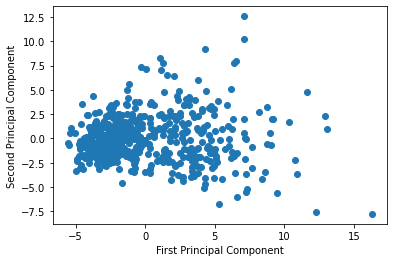

In [4]:
#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

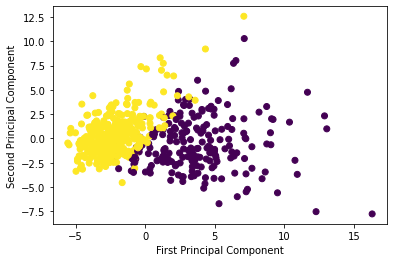

In [5]:
#Visualize the principal components with a color scheme
plt.scatter(x_pca[:,0],x_pca[:,1], c=raw_data['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [6]:
#Investigating at the principal components
pca.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])